# Complete Notebook
## Module Loader

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
sns.set()
%matplotlib inline

In [2]:
def sqft_to_m2(sqft):
    '''Converts sqft to m2
    Input: sqft (square feet value)
    Returns: converted m² value'''
    m2 = sqft / 10.764
    return m2

outlier_ids = []


## Analysis (General)
### Dataloader

In [3]:
path = r"data\train.csv"
X_raw = pd.read_csv(path, index_col="Id")
X_ana = X_raw.copy()
X_test = pd.read_csv(path, index_col ="Id")
print(X_raw.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### General analysis

**The Problem:**  
We want to predict houseprices based on several parameters of different segments.

Steps:  
A. Read the docs and get information about the dataset, its gathering and the environment of the dataset  
B. Analyse column by columns and make information about Type, Segment, Expected Importance  
C. Test the assumptions with box / scatter plots  
D. Write down consolidated information about importance  



A. Dataset information
Unfortunately no additional information were provided within the competition  
  
B. Analysis of every column
After revising every column and its describtion from the data_description.csv-file I have segmented and prioritized the different variabels.  
The most important ones form my perspective are:  
* LotArea
* Utilities
* Neighborhood
* BldgType
* OverallQual
* OverallCond
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* FullBath
* BedroomAbvGr
* TotRmsAbvGrd
* GarageArea

Next I will try to verify this assumptions with a correlation analysis

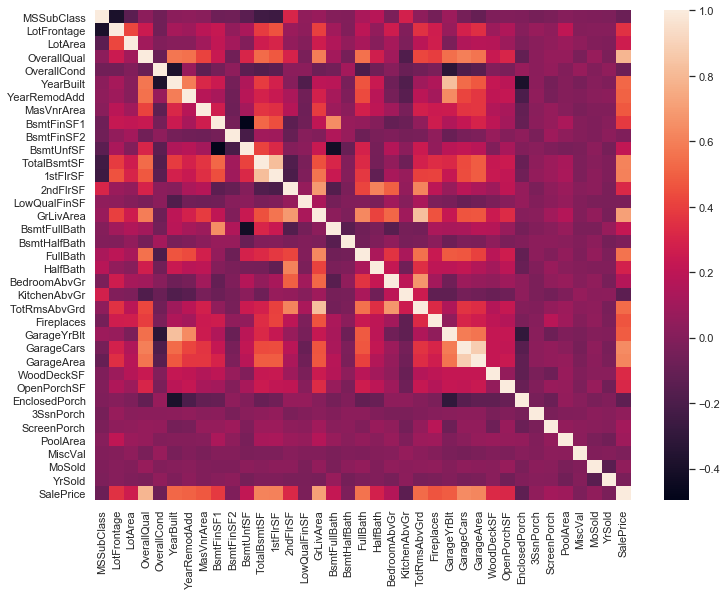

['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd'
 'GarageYrBlt' 'MasVnrArea' 'Fireplaces' 'BsmtFinSF1' 'LotFrontage'] ['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd' 'GarageYrBlt' 'MasVnrArea' 'Fireplaces' 'BsmtFinSF1']


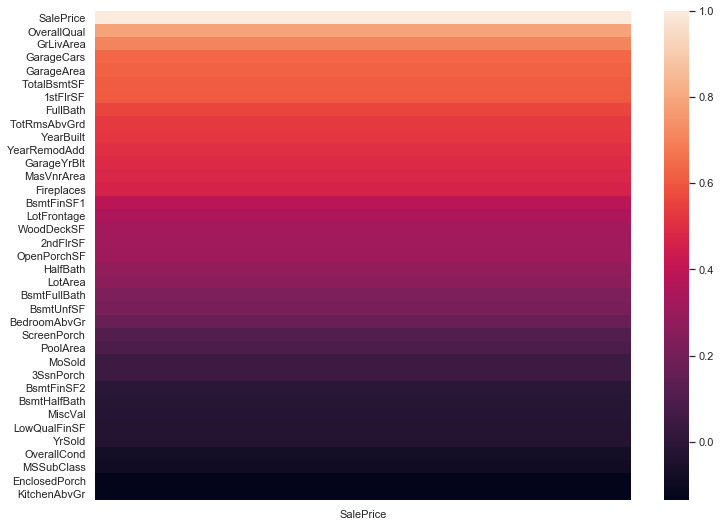

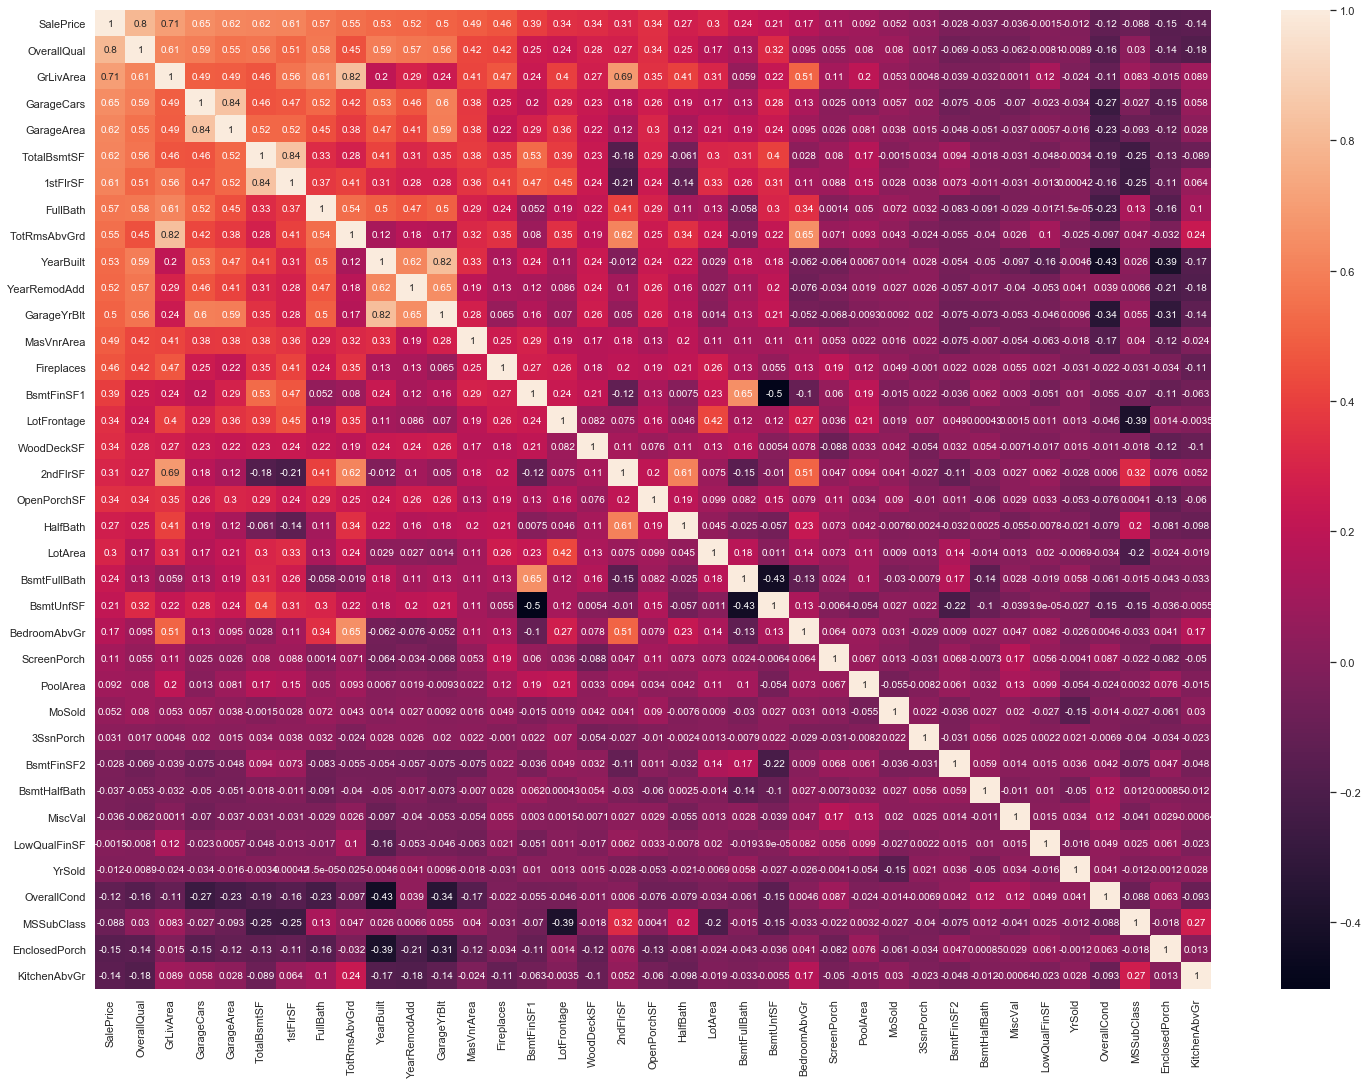

In [4]:
#X_corr = X_ana.dropna(axis=1)
corrmat = X_ana.corr() #X_corr.corr()
fig, ax = plt.subplots(figsize=(12, 9))
ax1 = sns.heatmap(corrmat)
plt.show()
fig2, _ =plt.subplots(figsize=(12,9))
ax2 = sns.heatmap(corrmat.iloc[:, -1:].nlargest(100, corrmat.columns[-1]))
fig3, _ = plt.subplots(figsize=(25,18))

n_all = len(X_ana.columns)
n_specific = 16

cols = corrmat.nlargest(n_specific, "SalePrice")["SalePrice"].index 
cols_all = corrmat.nlargest(n_all, "SalePrice")["SalePrice"].index
#found missings in X_ana -> resulting in failure of corrcoef
#print(X_ana[cols].isna().any().sum())
#remove rows with missing values
X_ana_no_nan = X_ana.dropna(subset=cols_all, axis=0)

#use cleaned DF to proceed here
cm = np.corrcoef(X_ana_no_nan[cols_all].values, rowvar=False)
ax3 = sns.heatmap(cm, cbar=True,annot=True, xticklabels=cols_all.values, yticklabels=cols_all.values)

print(cols.values[1:16], cols.values[-16: -1])


The Top 15 most correlated columns according to this correlation analysis are  
'OverallQual'  
'GrLivArea'  
'GarageCars'  
'GarageArea'  
'TotalBsmtSF'  
'1stFlrSF'  
'FullBath'  
'TotRmsAbvGrd'  
'YearBuilt'  
'YearRemodAdd'  
'GarageYrBlt'  
'MasVnrArea'  
'Fireplaces'  
'BsmtFinSF1'  
'LotFrontage'   

The 15 least correlated columns according to this correlation analysis are  
'BsmtUnfSF'  
'BedroomAbvGr'  
'ScreenPorch'  
'PoolArea'  
'MoSold'  
'3SsnPorch'   
'BsmtFinSF2'  
'BsmtHalfBath'  
'MiscVal'  
'LowQualFinSF'  
'YrSold'    
'OverallCond'   
'MSSubClass'   
'EnclosedPorch'    

All others will be classified as Medium 

This insights results in an change of the potential importance of the features in the columns analysis, stated now in the Correlation column  
  
Possible siblings(high correlation) within high important variables are:  
* GarageArea and **GarageCars**:  
    The more cars fit in, the larger the garage has to be and vice versa  

* **TotalBsmtSF** and 1stFlrSF:  
    The first floor is mostly a similar size to the basement if existing  
      
* **YearBuilt**, YearRemodAdd and GarageYrBlt:  
    Most of the time the garage is build together with the house  
    YearRemodAdd is the same as the building year when not remodified since then  
    Best of them is YearBuilt 
  
  
* **GrLivArea** and TotRmsAbvGrd:  
    If the living area is bigger, potentially more rooms are in the house 
    Decision: GrLivArea  
  


In [5]:
#removing the siblings from cols
cols_clean = list(set(cols) - set(["GarageArea", "1stFlrSF", "YearRemodAdd", "GarageYrBlt", "TotRmsAbvGrd"]))
cols_all_clean = list(set(cols) - set(["GarageArea", "1stFlrSF", "YearRemodAdd", "GarageYrBlt", "TotRmsAbvGrd"]))
print(cols_clean)

['GrLivArea', 'YearBuilt', 'Fireplaces', 'FullBath', 'SalePrice', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'LotFrontage', 'OverallQual', 'GarageCars']


### SalePrice - Analysis of the dependent variable  
  
SalePrice will be the predicted variable. Let's take a look on it

In [6]:
print(X_ana.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


looks like no 0 values (very good), positive skewness(not so good), some big ones at the end.  
Taking a picture of it including a normal dist to compare:

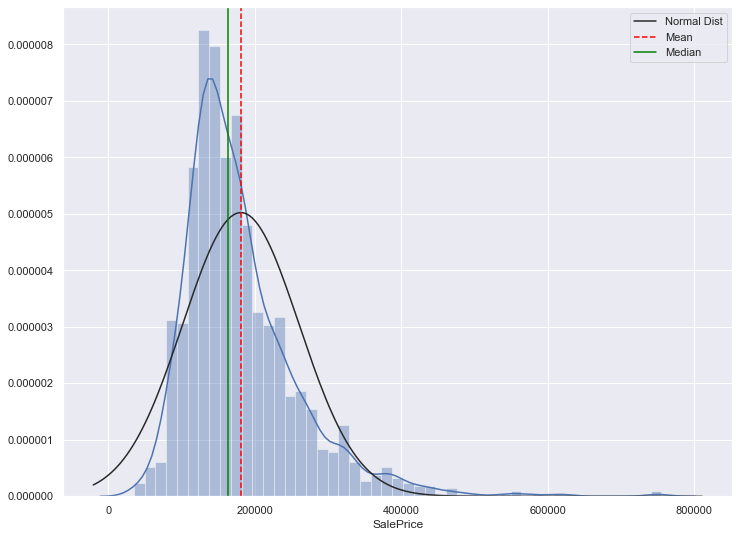

In [7]:
fig, ax_dist = plt.subplots(figsize=(12,9), sharex=True)
mean = X_ana.SalePrice.mean()
median = X_ana.SalePrice.median()
sns.distplot(X_ana.SalePrice, fit=stats.norm, ax = ax_dist)
ax_dist.axvline(mean, color="red", linestyle="--")
ax_dist.axvline(median, color="green", linestyle = "-")
plt.legend({"Normal Dist":stats.norm, "Mean":mean, "Median":median})

Looks like a  
* deviation from normal   
* including high peak  
* with positive skewness  
* and outliers on the right (potentially above 700000).   

Measurements in numbers: 

In [8]:
print("Kurtosis: %f" % X_ana.SalePrice.kurt())
print("Skewness: %f" % X_ana.SalePrice.skew())

Kurtosis: 6.536282
Skewness: 1.882876


Maybe we should transform it with a log function and look at it again


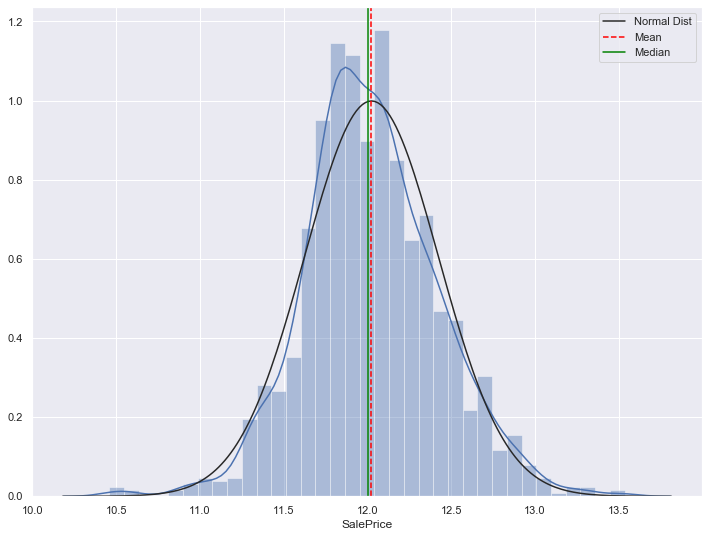

In [9]:
#apply log
X_ana["SalePrice"] = np.log1p(X_ana["SalePrice"])

#inspect again
fig, ax_dist = plt.subplots(figsize=(12,9), sharex=True)
mean = X_ana.SalePrice.mean()
median = X_ana.SalePrice.median()
sns.distplot(X_ana.SalePrice, fit=stats.norm, ax = ax_dist)
ax_dist.axvline(mean, color="red", linestyle="--")
ax_dist.axvline(median, color="green", linestyle = "-")
plt.legend({"Normal Dist":stats.norm, "Mean":mean, "Median":median})

**Much better now!**

### Univariante analysis of all variables

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleType' '

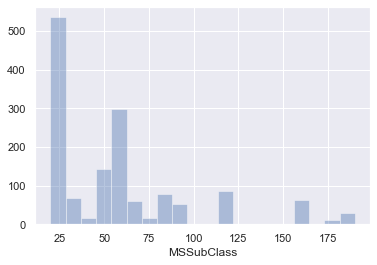



count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
# of unique values: 5
# of NaNs: 0


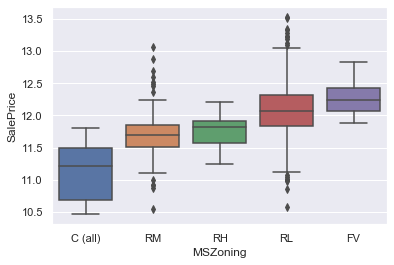



count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
# of unique values: 110
# of NaNs: 259
Collerlation to SalePrice: 0.351799


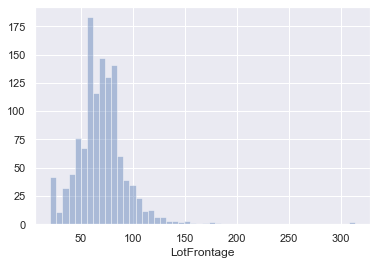



count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
# of unique values: 1073
# of NaNs: 0
Collerlation to SalePrice: 0.263843


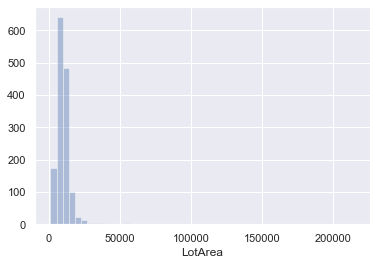



count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
# of unique values: 2
# of NaNs: 0


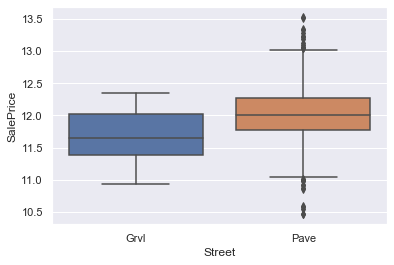



count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
# of unique values: 2
# of NaNs: 1369


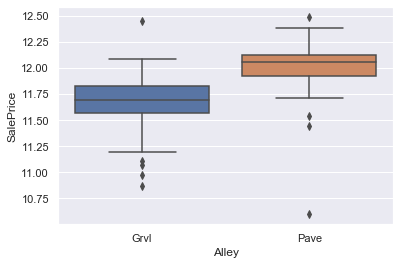



count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
# of unique values: 4
# of NaNs: 0


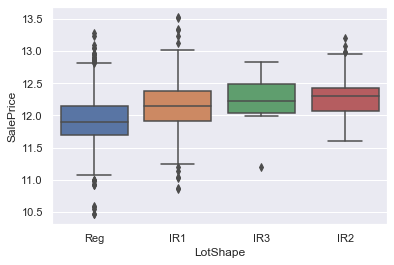



count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
# of unique values: 4
# of NaNs: 0


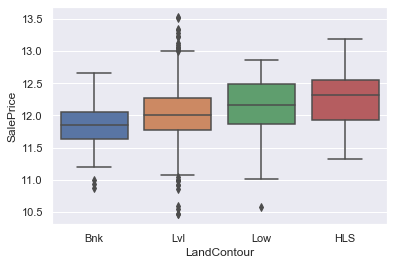



count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
# of unique values: 2
# of NaNs: 0


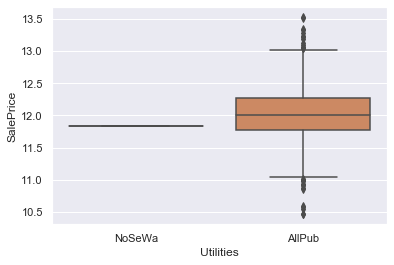



count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
# of unique values: 5
# of NaNs: 0


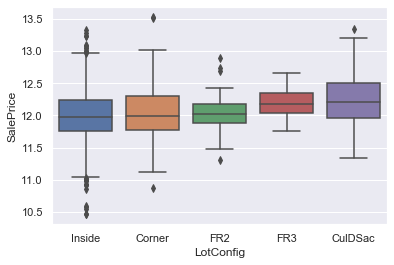



count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
# of unique values: 3
# of NaNs: 0


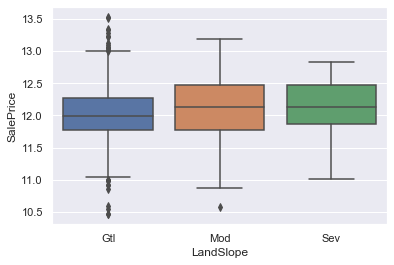



count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
# of unique values: 25
# of NaNs: 0


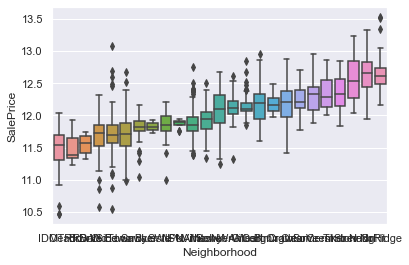



count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
# of unique values: 9
# of NaNs: 0


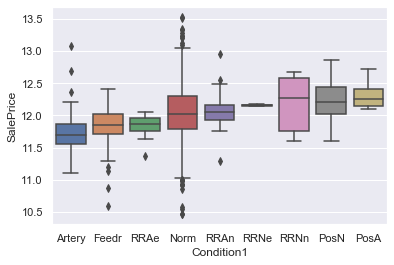



count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object
# of unique values: 8
# of NaNs: 0


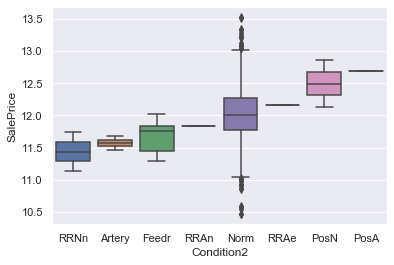



count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object
# of unique values: 5
# of NaNs: 0


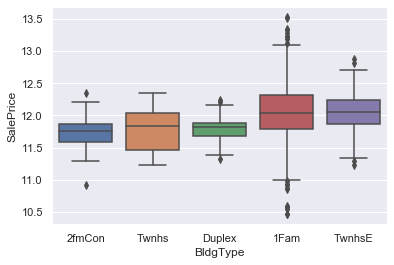



count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object
# of unique values: 8
# of NaNs: 0


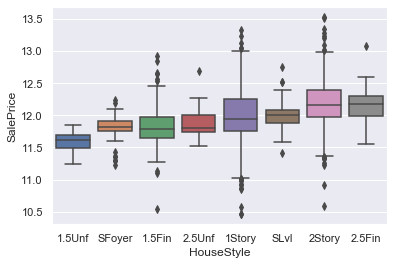



count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
# of unique values: 10
# of NaNs: 0
Collerlation to SalePrice: 0.790982


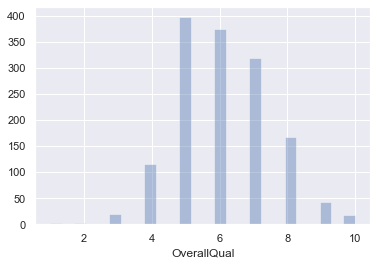



count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
# of unique values: 9
# of NaNs: 0
Collerlation to SalePrice: -0.077856


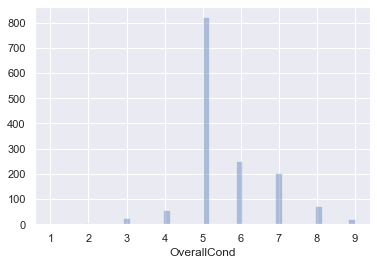



count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
# of unique values: 112
# of NaNs: 0
Collerlation to SalePrice: 0.522897


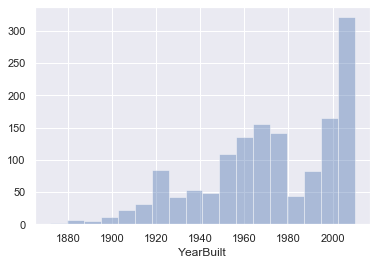



count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
# of unique values: 61
# of NaNs: 0
Collerlation to SalePrice: 0.507101


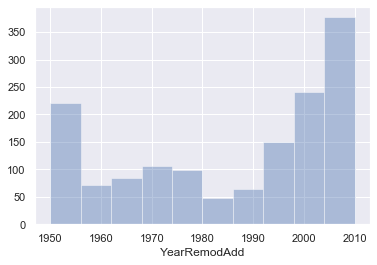



count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object
# of unique values: 6
# of NaNs: 0


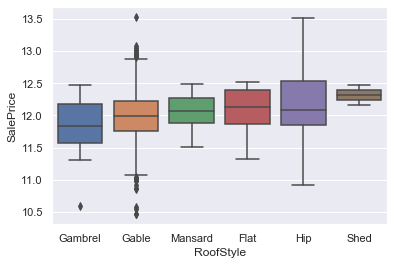



count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object
# of unique values: 8
# of NaNs: 0


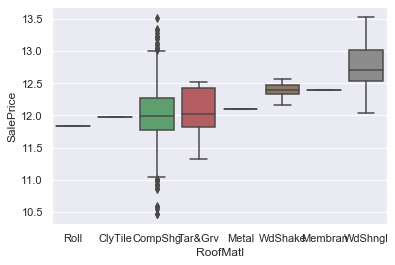



count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object
# of unique values: 15
# of NaNs: 0


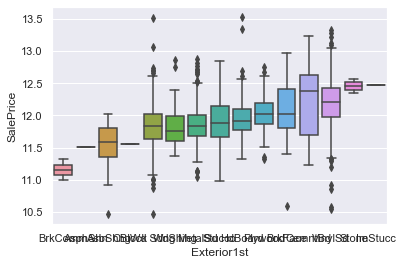



count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object
# of unique values: 16
# of NaNs: 0


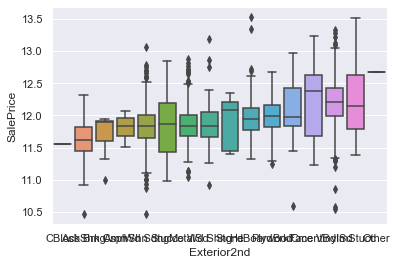



count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
# of unique values: 4
# of NaNs: 8


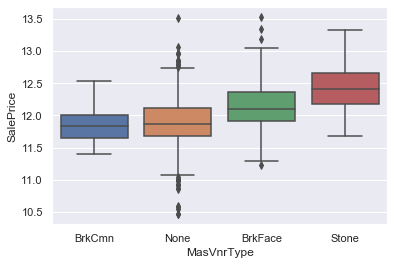



count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
# of unique values: 327
# of NaNs: 8
Collerlation to SalePrice: 0.477493


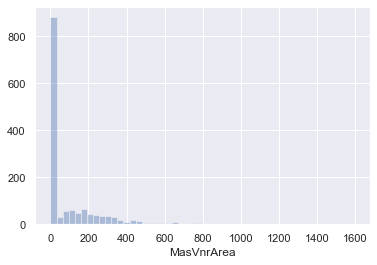



count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
# of unique values: 4
# of NaNs: 0


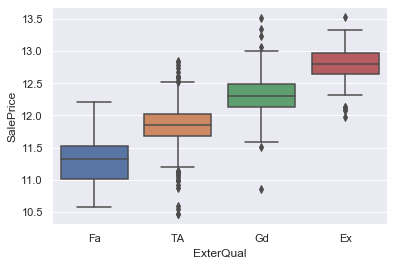



count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object
# of unique values: 5
# of NaNs: 0


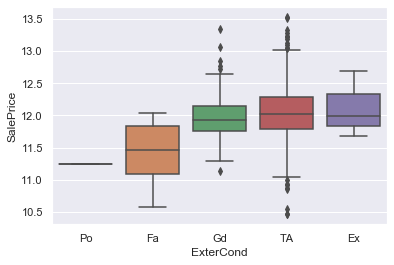



count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
# of unique values: 6
# of NaNs: 0


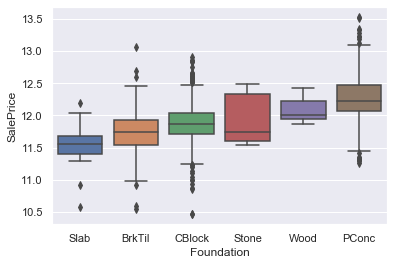



count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
# of unique values: 4
# of NaNs: 37


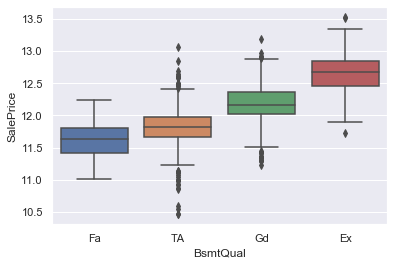



count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
# of unique values: 4
# of NaNs: 37


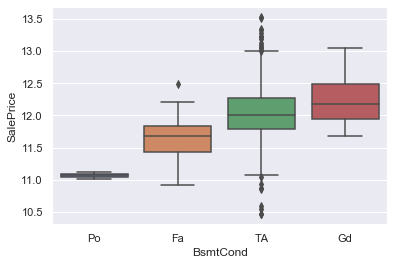



count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
# of unique values: 4
# of NaNs: 38


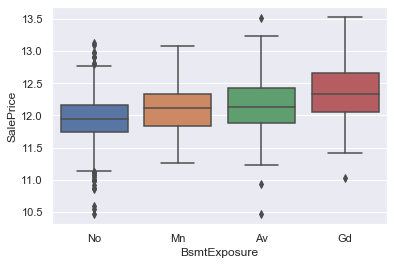



count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
# of unique values: 6
# of NaNs: 37


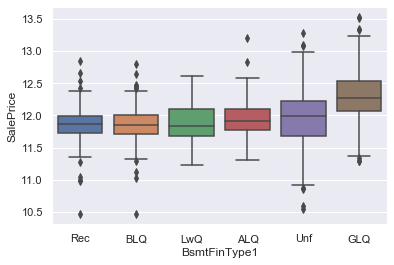



count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
# of unique values: 637
# of NaNs: 0
Collerlation to SalePrice: 0.386420


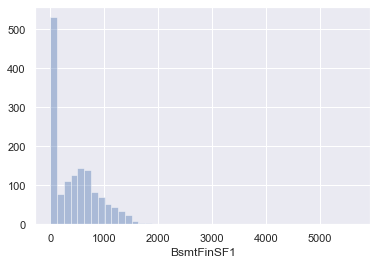



count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
# of unique values: 6
# of NaNs: 38


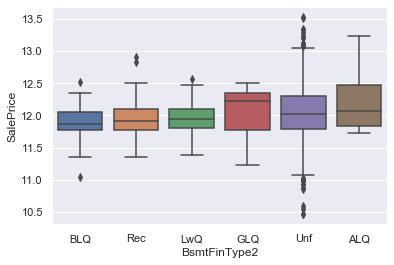



count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
# of unique values: 144
# of NaNs: 0
Collerlation to SalePrice: -0.011378


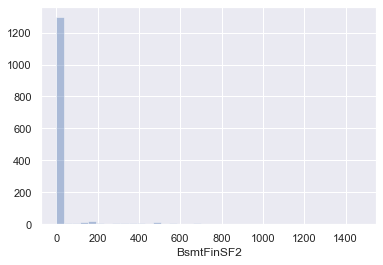



count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
# of unique values: 780
# of NaNs: 0
Collerlation to SalePrice: 0.214479


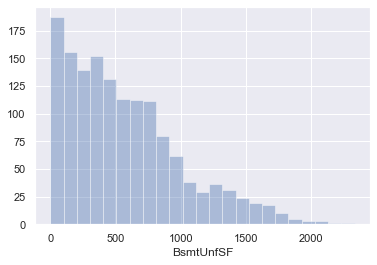



count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
# of unique values: 721
# of NaNs: 0
Collerlation to SalePrice: 0.613581


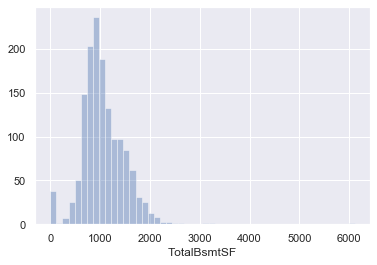



count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object
# of unique values: 6
# of NaNs: 0


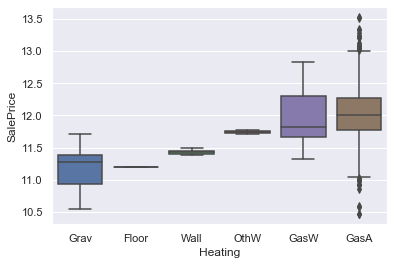



count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object
# of unique values: 5
# of NaNs: 0


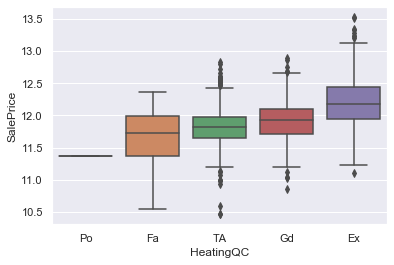



count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object
# of unique values: 2
# of NaNs: 0


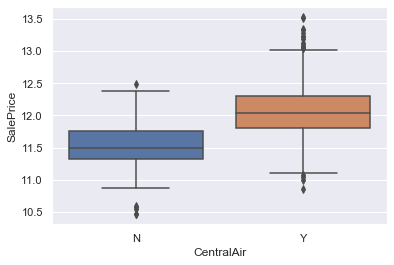



count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
# of unique values: 5
# of NaNs: 1


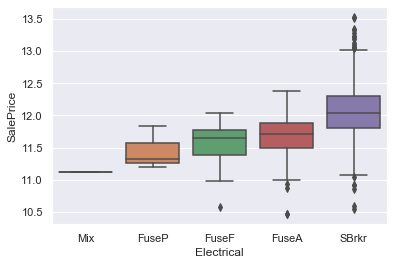



count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
# of unique values: 753
# of NaNs: 0
Collerlation to SalePrice: 0.605852


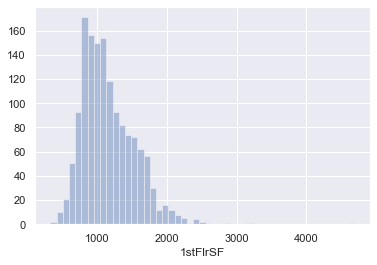



count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
# of unique values: 417
# of NaNs: 0
Collerlation to SalePrice: 0.319334


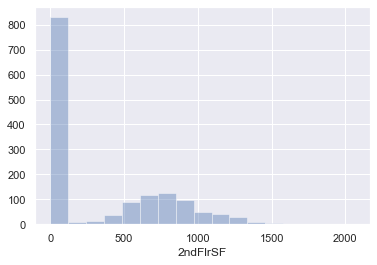



count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
# of unique values: 24
# of NaNs: 0
Collerlation to SalePrice: -0.025606


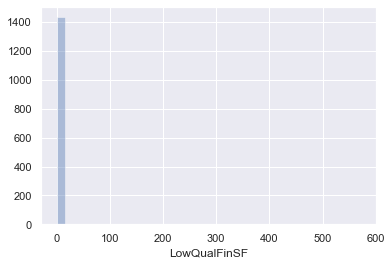



count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
# of unique values: 861
# of NaNs: 0
Collerlation to SalePrice: 0.708624


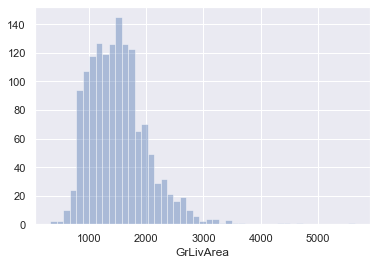



count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
# of unique values: 4
# of NaNs: 0
Collerlation to SalePrice: 0.227122


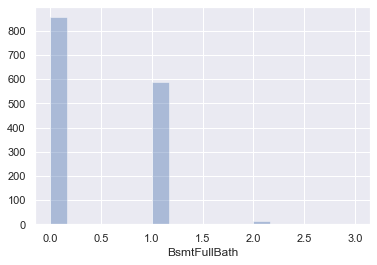



count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
# of unique values: 3
# of NaNs: 0
Collerlation to SalePrice: -0.016844


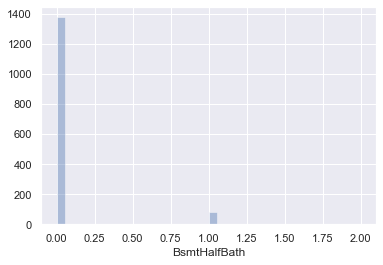



count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
# of unique values: 4
# of NaNs: 0
Collerlation to SalePrice: 0.560664


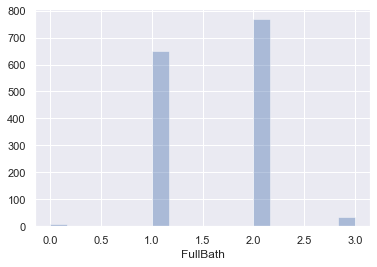



count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
# of unique values: 3
# of NaNs: 0
Collerlation to SalePrice: 0.284108


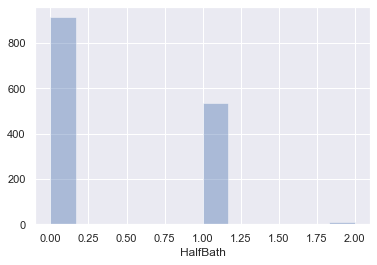



count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
# of unique values: 8
# of NaNs: 0
Collerlation to SalePrice: 0.168213


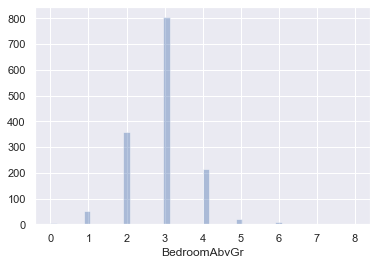



count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
# of unique values: 4
# of NaNs: 0
Collerlation to SalePrice: -0.135907


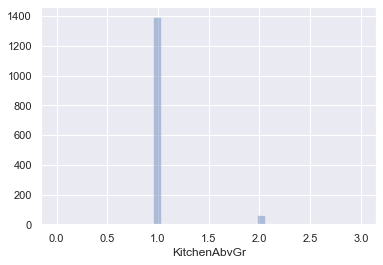



count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object
# of unique values: 4
# of NaNs: 0


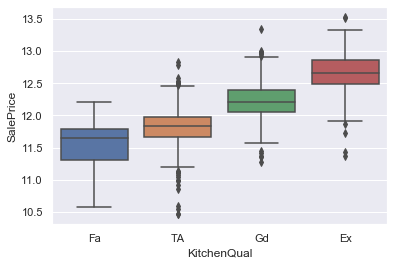



count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
# of unique values: 12
# of NaNs: 0
Collerlation to SalePrice: 0.533723


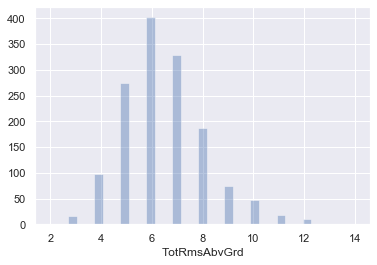



count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object
# of unique values: 7
# of NaNs: 0


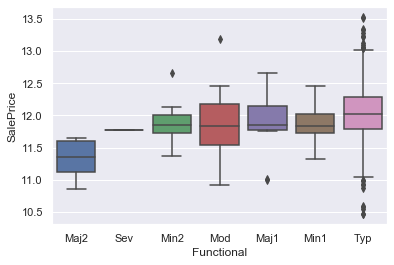



count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
# of unique values: 4
# of NaNs: 0
Collerlation to SalePrice: 0.466929


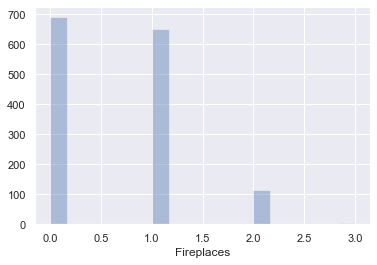



count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
# of unique values: 5
# of NaNs: 690


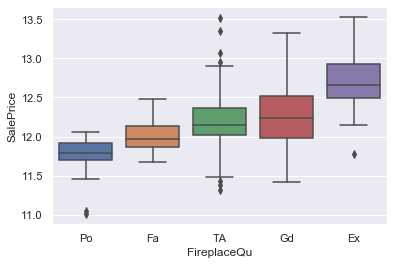



count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
# of unique values: 6
# of NaNs: 81


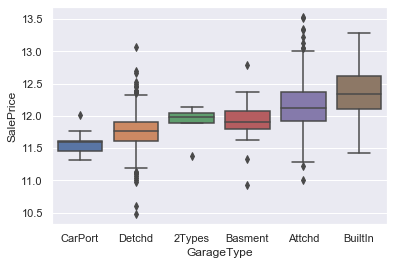



count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
# of unique values: 97
# of NaNs: 81
Collerlation to SalePrice: 0.486362


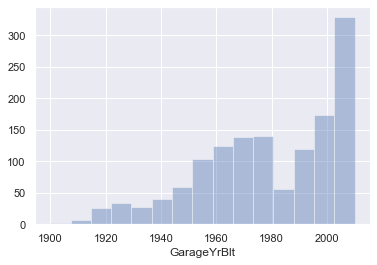



count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
# of unique values: 3
# of NaNs: 81


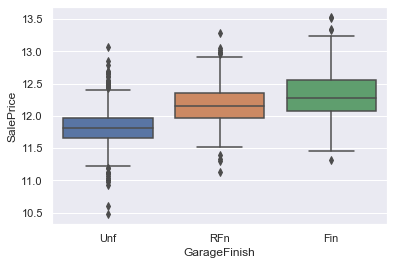



count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
# of unique values: 5
# of NaNs: 0
Collerlation to SalePrice: 0.640409


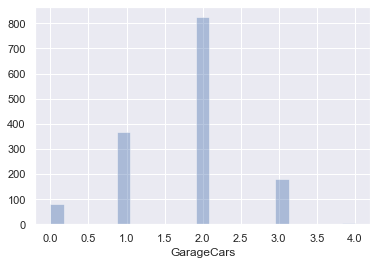



count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
# of unique values: 441
# of NaNs: 0
Collerlation to SalePrice: 0.623431


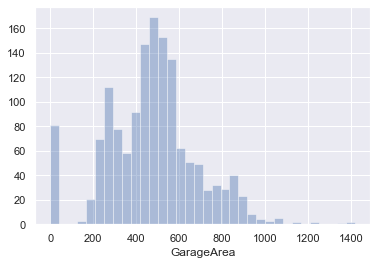



count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
# of unique values: 5
# of NaNs: 81


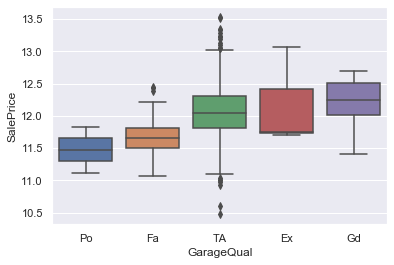



count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
# of unique values: 5
# of NaNs: 81


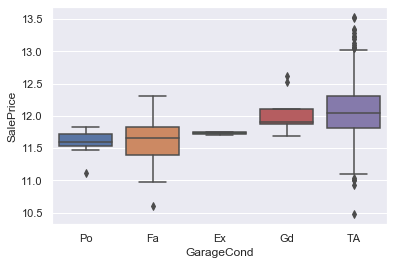



count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object
# of unique values: 3
# of NaNs: 0


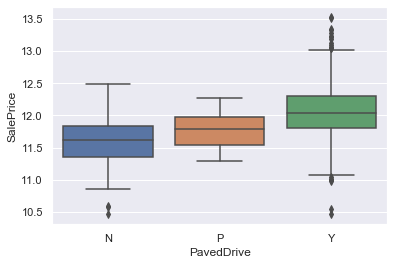



count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
# of unique values: 274
# of NaNs: 0
Collerlation to SalePrice: 0.324413


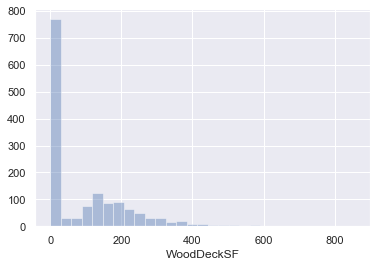



count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
# of unique values: 202
# of NaNs: 0
Collerlation to SalePrice: 0.315856


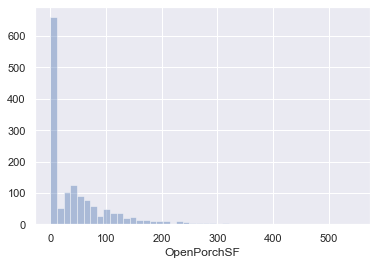



count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
# of unique values: 120
# of NaNs: 0
Collerlation to SalePrice: -0.128578


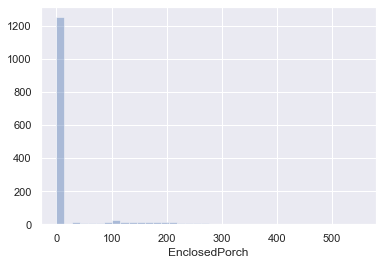



count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
# of unique values: 20
# of NaNs: 0
Collerlation to SalePrice: 0.044584


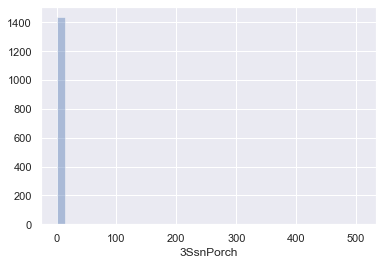



count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64
# of unique values: 76
# of NaNs: 0
Collerlation to SalePrice: 0.111447


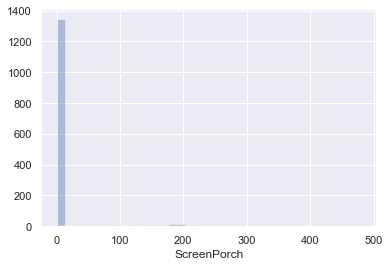



count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
# of unique values: 8
# of NaNs: 0
Collerlation to SalePrice: 0.092404


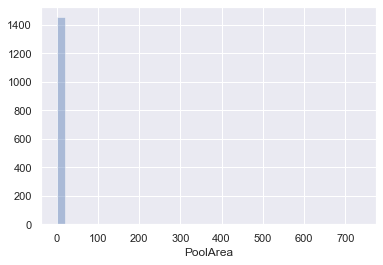



count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object
# of unique values: 3
# of NaNs: 1453


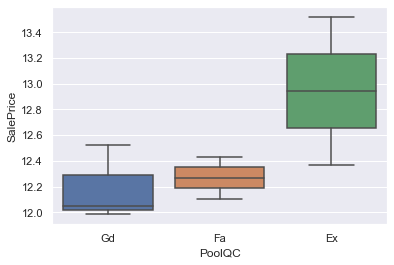



count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object
# of unique values: 4
# of NaNs: 1179


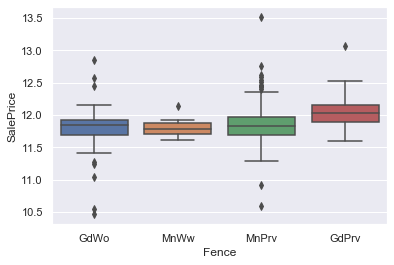



count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object
# of unique values: 4
# of NaNs: 1406


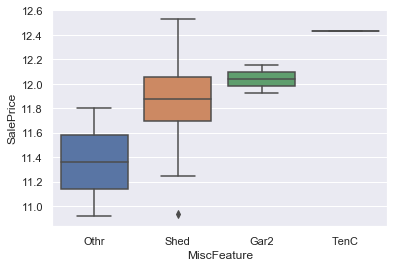



count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64
# of unique values: 21
# of NaNs: 0
Collerlation to SalePrice: -0.021190


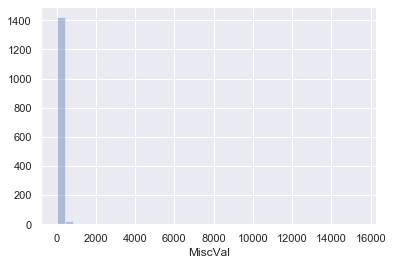



count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
# of unique values: 12
# of NaNs: 0
Collerlation to SalePrice: 0.046432


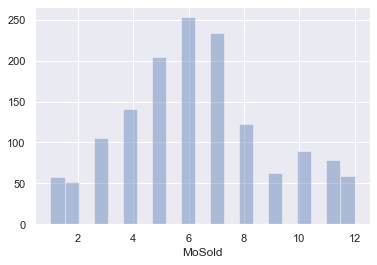



count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
# of unique values: 5
# of NaNs: 0
Collerlation to SalePrice: -0.028923


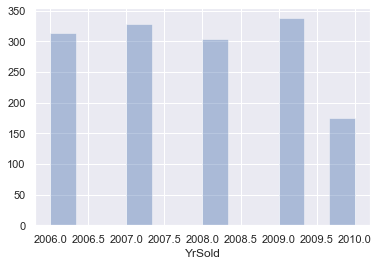



count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object
# of unique values: 9
# of NaNs: 0


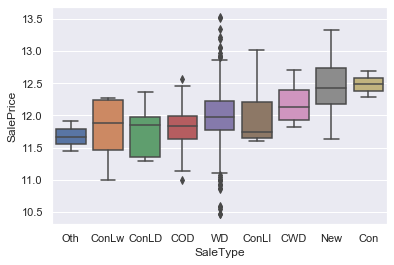



count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object
# of unique values: 6
# of NaNs: 0


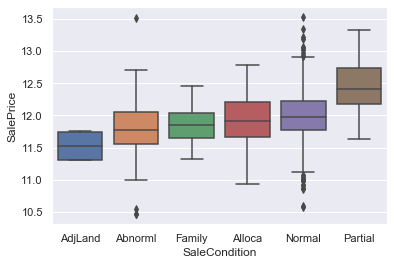



count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64
# of unique values: 663
# of NaNs: 0
Collerlation to SalePrice: 1.000000


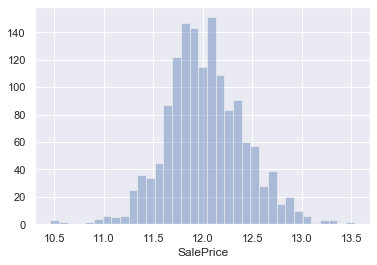

In [10]:
#reminder for the list of all variables
features = X_ana.copy()
all_cols = X_ana.columns.values
print(all_cols)

#define all numeric types
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#print overview for all other types
for col in all_cols:
    print(X_ana[col].describe())
    print("# of unique values: %i" %X_ana[col].value_counts().count())
    print("# of NaNs: %i" %X_ana[[col]].isna().sum().values)
    if X_ana[col].dtype in numeric_types :
        sns.distplot(X_ana[col],hist= True, kde=False)
        print("Collerlation to SalePrice: %f" %corrmat.loc["SalePrice",col])
        
    else:
        sns.boxplot(x=col, y="SalePrice", data=X_ana, order=X_ana.groupby(col)["SalePrice"].mean().sort_values().index)
    plt.show()
    print("\n")    

    

[]


Index(['LotFrontage', '1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF',
       'MSSubClass', 'TotRmsAbvGrd', 'GarageArea', 'GarageCars', 'Fireplaces',
       'BedroomAbvGr', 'OverallQual', 'BsmtFinSF1', 'PoolArea', 'FullBath',
       'MasVnrArea', 'OpenPorchSF', 'BsmtUnfSF', 'YearBuilt', 'BsmtFullBath',
       'YearRemodAdd', 'WoodDeckSF', '2ndFlrSF', 'GarageYrBlt', '3SsnPorch',
       'OverallCond', 'HalfBath', 'BsmtFinSF2', 'ScreenPorch', 'LowQualFinSF',
       'MoSold', 'EnclosedPorch', 'YrSold', 'BsmtHalfBath', 'KitchenAbvGr',
       'MiscVal'],
      dtype='object')


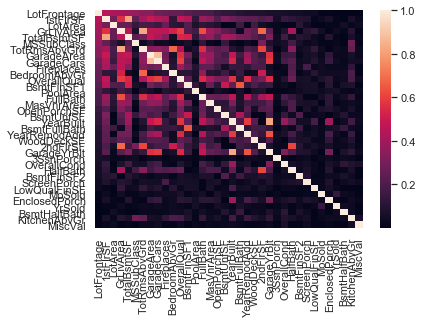

In [11]:
#### Finding the LotFrontage correlation

correlmat = X_raw.iloc[:, X_raw.columns != "SalePrice"].corr()
correlmat = correlmat.apply(lambda x: x.abs())
colsmax = correlmat["LotFrontage"].nlargest(150).index
#colsmin = correlmat["LotFrontage"].nsmallest(10).index
#cols = colsmax.append(colsmin)
cols = colsmax
cm2 = correlmat.loc[cols, cols]
sns.heatmap(cm2, xticklabels=cols, yticklabels=cols)
#specific_value = correlmat.loc["LotFrontage", "Neighborhood"]
print(cols)

stdevs_LotFrontage = {}
for col in X_raw.select_dtypes("object"):
    std_value = X_raw.groupby(col)["LotFrontage"].mean().std()
    stdevs_LotFrontage[col]= std_value
    #print("Variable: {} with std of {}".format(col, std_value))
#print(X_raw.groupby(["LotShape", "LotConfig","BldgType"])["LotFrontage"].median())


How can we describe the relation between the Top 15 relatives and SalePrice?

Using jointplots to take a deeper look at it:

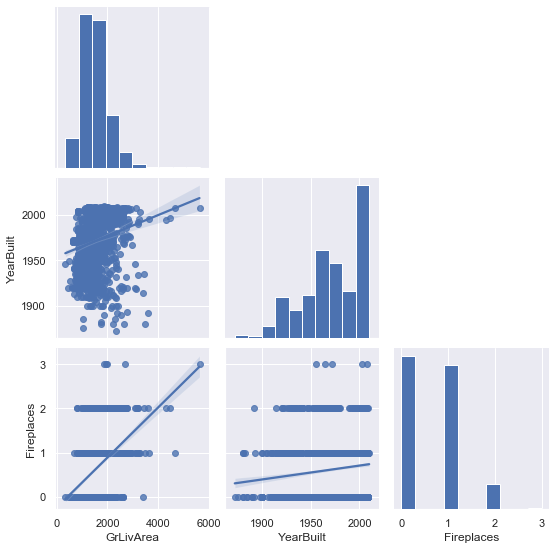

In [12]:
#for i, col in enumerate([c for c in cols_clean if c != "SalePrice"]):
#    fig, _ = plt.subplots(figsize=(12,9))
#    sns.scatterplot(x=col, y="SalePrice", data = X_ana)
#    plt.show()
sns.pairplot(data = X_ana[cols_clean[:3]], corner=True, kind="reg")


Now a detailed analysis for each of the remainind Top columns via visual inspection starting with **OverallQual**:

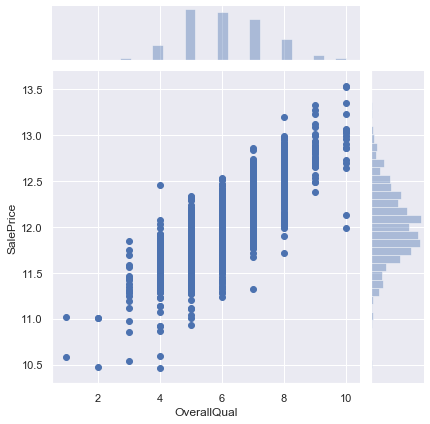

In [13]:
#OverallQual
sns.jointplot(x="OverallQual", y="SalePrice", data = X_ana )

OverallQual seems to be exponentially related to Sales price with a wider spread at the upper end of the spectrum  
  
**Conclusion:** looks like a linear correlation to log(SalePrice)  
  
Next one will be 'GrLivArea'

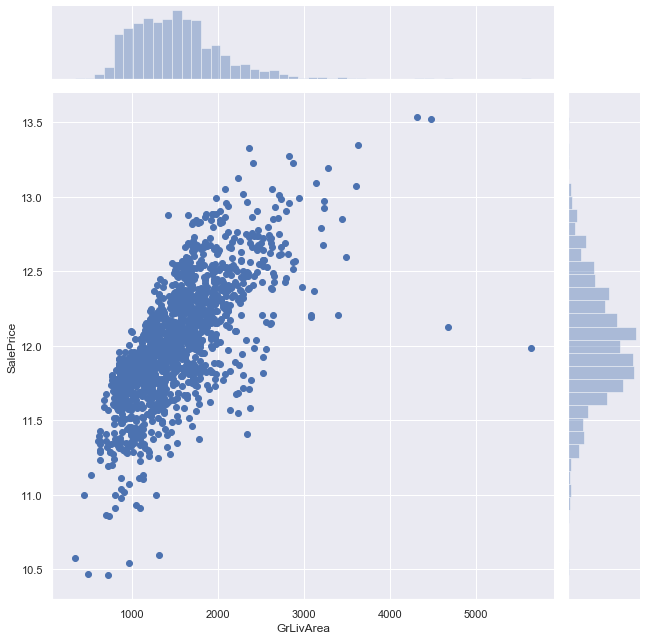

In [14]:
#GrLivArea
sns.jointplot(x="GrLivArea", y="SalePrice", data = X_ana, height=9, ratio=6 )

The relation could be a really steep linear with tendency to log relation based on the upper spectrum of X.  
Log-Transformation does the trick here.



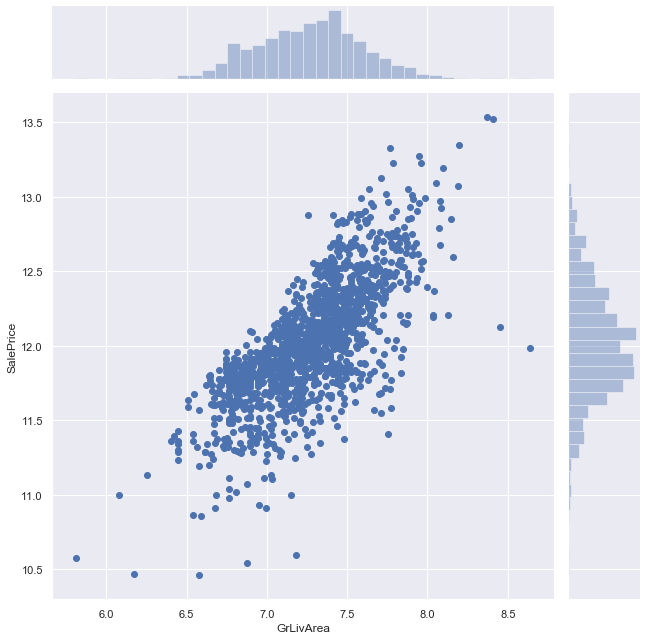

In [15]:
X_ana["GrLivArea" ] = np.log(X_ana["GrLivArea"])
sns.jointplot(x="GrLivArea", y="SalePrice", data = X_ana, height=9, ratio=6 )

No it looks quite nice, doesn't it?

Next one is GarageCars

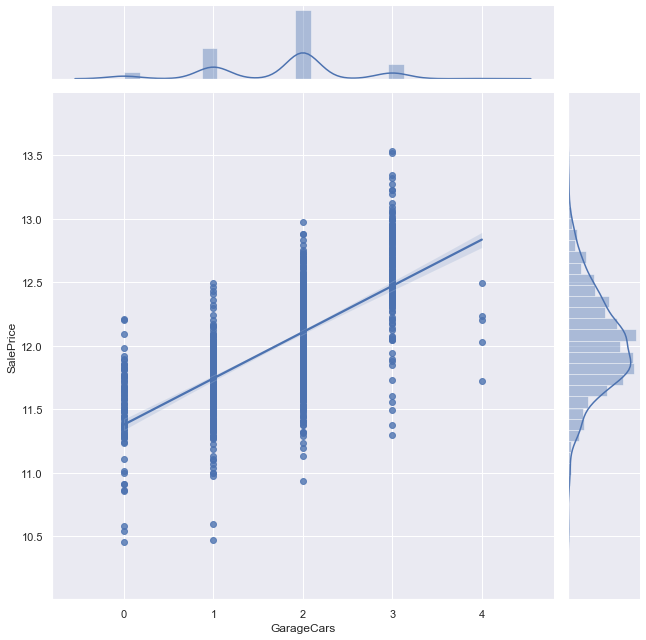

In [16]:
sns.jointplot(x="GarageCars", y="SalePrice", data=X_ana, kind="reg",height=9, ratio=6 )

This distributition looks very linear to me with a few outliers on the upper end (somekind of pattern...)

Next one: TotalBsmtSF

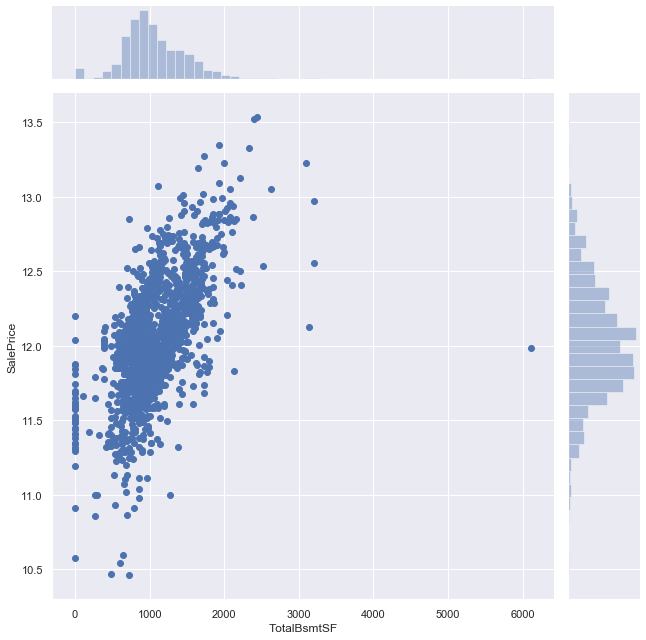

In [17]:
sns.jointplot(x='TotalBsmtSF', y="SalePrice", data=X_ana, height = 9, ratio= 6)

In [18]:
print(sqft_to_m2(6100))
TBSF_out = X_ana[X_ana["TotalBsmtSF"]>6000].index.values
print("ID with mega big basement: %i" % TBSF_out)

566.7038275733928
ID with mega big basement: 1299


Aright: There must be a house (ID 1299) with a really, realy big basement :D Like 6100 sqft or 567 m² big.  
Beside that, the curve looks loggy to me.
On the other hand is a larger group of zeros present. This could be an indication for houses without basement.

Transformation:  
* additional column [HasBasement] with 0 or 1 if value of TotalBsmtSF = 0 or > 0
* change of values = 0 to 1
* np.log for values > 0


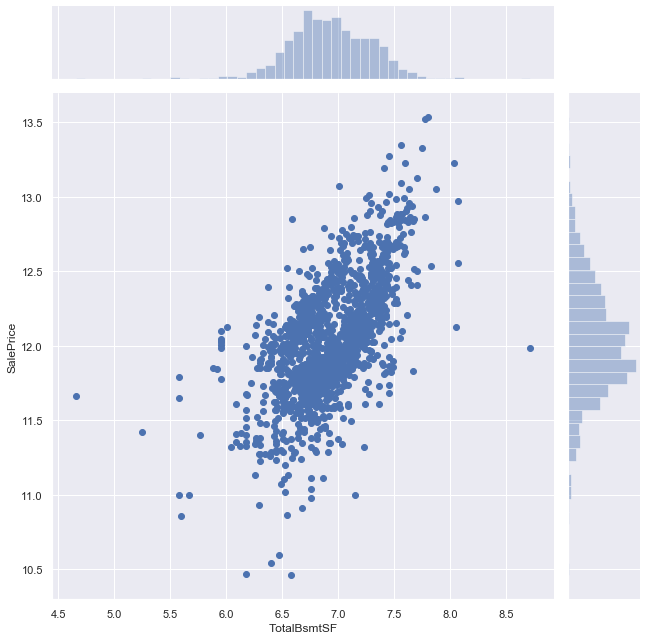

In [19]:
X_ana["HasBasement"] = X_ana['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X_ana["TotalBsmtSF"] = X_ana['TotalBsmtSF'].apply(lambda x: -999 if x == 0 else x)
X_ana["TotalBsmtSF"] = np.log(X_ana["TotalBsmtSF"])
sns.jointplot(x='TotalBsmtSF', y="SalePrice", data=X_ana, height = 9, ratio= 6)

Looks way better.

Next one: Year Build

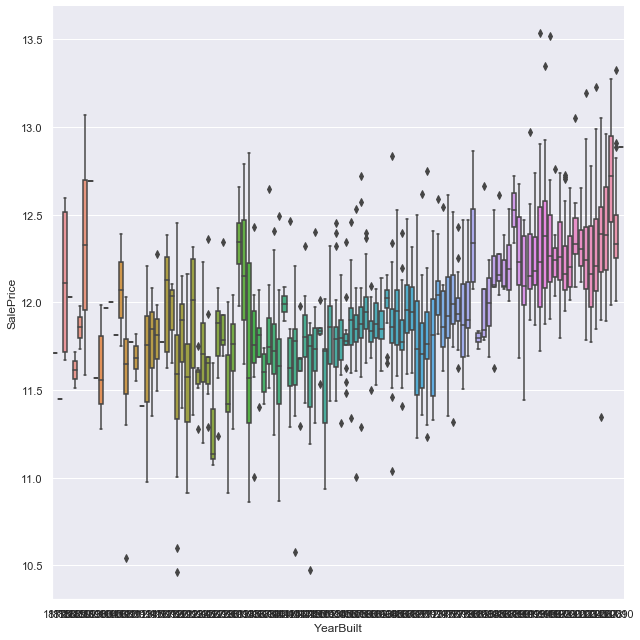

In [20]:
#plot pairplot
sns.catplot(kind="box", x="YearBuilt", y="SalePrice", data=X_ana, height=9)

Looks like a slightly exponentail growth over time but this cannot be verified due to lack of information about potential inflation considered in the prices

Next one: MasVnrArea

Count of 0 in MasVnrArea: 861
Count of rest: 599


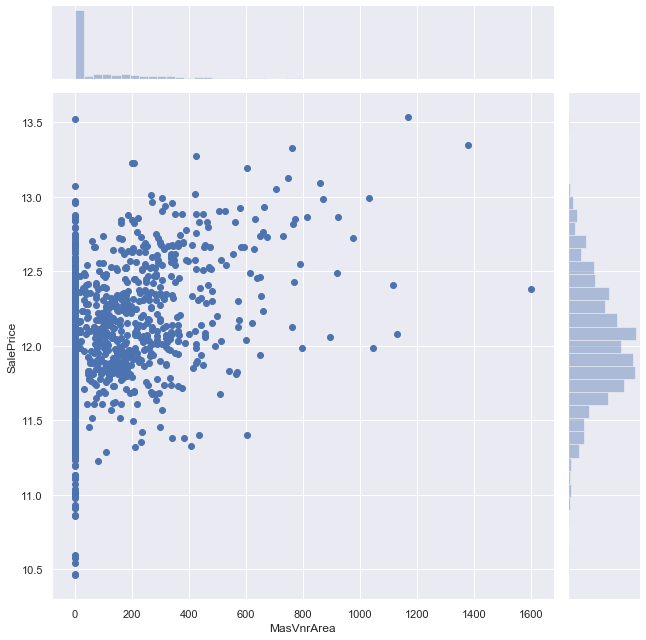

In [21]:
#scatterplot of MasVnrArea against log(SalePrice)
sns.jointplot(x="MasVnrArea", y="SalePrice", data=X_ana, height=9, ratio=6)
n_zeros = X_ana["MasVnrArea"].value_counts().sort_index()[0]
print("Count of 0 in MasVnrArea: %i" % n_zeros)
print("Count of rest: %i" % (len(X_ana)-(n_zeros)))

There are a lot of houses without Masonry. The solution could be a colum has Masonry or not and dropping the original one. ->column simplification
On the other hand, the remaining 599 houses with data about masonry are in a medium correlation to Sales Price...  
  
Transformation:  
Do nothing about...

Next one:





In [22]:
print(cols_clean)

['GrLivArea', 'YearBuilt', 'Fireplaces', 'FullBath', 'SalePrice', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'LotFrontage', 'OverallQual', 'GarageCars']


### Further Analysis

In [23]:
X_raw = pd.read_csv('../input/train.csv', index_col='Id')
X_test = pd.read_csv('../input/test.csv', index_col='Id')







X = X_raw.copy()

neighborhood_ordered = list(X.groupby("Neighborhood")["SalePrice"].mean().sort_values().index)

X.dropna(subset=["SalePrice"], axis=0, inplace=True)
#X.dropna(axis=1, inplace = True)
y = X.SalePrice
X.drop("SalePrice", axis=1, inplace=True)

print(X.head())
print(X.info())
print(X.describe())

col_obj = X.select_dtypes(include=["object", "bool"]).columns
col_obj_above_10 = list([col for col in col_obj if X[col].nunique() > 15])
col_obj_below_10 = list(set(col_obj)-set(col_obj_above_10))
col_num = list(X.select_dtypes(exclude=["object", "bool"]).columns)
col_with_nan = [col for col in X.columns if X[col].isna().any()]


print("Summary:\n")
print("Number of columns: {}".format(len(X.columns)))
print("Number of object columns: {}".format(len(col_obj)))
print("Number of columns with NaNs: {}".format(len(col_with_nan)))
print("Number of object columns with NaNs: {}".format(len(set(col_with_nan)-set(col_num))))
print("Number of numeric columns with NaNs: {}".format(len(set(col_with_nan)-set(col_obj))))


FileNotFoundError: [Errno 2] File ../input/train.csv does not exist: '../input/train.csv'

The 

## Pipeline and predictor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lars, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error



### Building the pipeline

In [25]:
res= {}
np.random.seed(1)

In [26]:

#Ordinal1:  "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC"
#Ordinal2:  ["BsmtFinType1","BsmtFinType2"]
#Ordinal3: "Electrical"
#Ordinal4: 

#numerical1:  LotFrontage

for c in ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC","Electrical","BsmtFinType1","BsmtFinType2"]:
    col_obj_below_10.remove(c)
    
#col_obj_below_10.remove(["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC","Electrical","BsmtFinType1","BsmtFinType2"])
col_obj_below_10.append("MSSubClass")
col_num.remove("LotFrontage")

X["LotFrontage"]= X.groupby(["LotShape", "LotConfig","BldgType"])["LotFrontage"].transform(lambda x: x.fillna(x.median()))
X_test["LotFrontage"] = X_test.groupby(["LotShape", "LotConfig","BldgType"])["LotFrontage"].transform(lambda x: x.fillna(x.median()))

X["MSSubClass"] = X["MSSubClass"].astype("category")
X_test["MSSubClass"] = X_test["MSSubClass"].astype("category")
#reg = ElasticNet()

X_train, X_valid, y_train, y_valid = train_test_split( X, y, train_size = 0.8, test_size=0.2, random_state=0)
reg = XGBRegressor(evals=([X_valid, y_valid]), eval_metric="mae", cv=True, seed=0 )


#numeric_transformer = Pipeline(["imputer",SimpleImputer(strategy="median")])

#log y
y_train, y_valid = np.log(y_train), np.log(y_valid)





#raising value error due to lack in synchronization caused by OneHotEncoder and OrdinalEncoder
preprocessing = ColumnTransformer(transformers=[("numeric", SimpleImputer(strategy = "median"), col_num) ,
                                                ("LotFrontage_", SimpleImputer(strategy = "median"), ["LotFrontage"]) ,

                                            ("obj_below_10", Pipeline([("obj_imputer1", SimpleImputer(strategy = "most_frequent")),
                                                                        ("OHE"            , OneHotEncoder(handle_unknown='ignore'
                                                                                                            ))
                                                                        ]), col_obj_below_10) ,
                                            ("Neighborhood_", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder1"  , OrdinalEncoder(categories=[neighborhood_ordered])
                                                                                                            )
                                                                        ]), ["Neighborhood"]),
                                            ("Ratings1_", Pipeline([("obj_imputer3", SimpleImputer(strategy = "constant", fill_value="TA")),
                                                                        ("label_encoder2"  , OrdinalEncoder(categories=[["Po", "Fa", "TA", "Gd", "Ex"],["Po", "Fa", "TA", "Gd", "Ex"],["Po", "Fa", "TA", "Gd", "Ex"],["Po", "Fa", "TA", "Gd", "Ex"],["Po", "Fa", "TA", "Gd", "Ex"]])
                                                                                                            )
                                                                        ]), [ "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC"]),
                                            ("Ratings2_", Pipeline([("obj_imputer4", SimpleImputer(strategy = "constant", fill_value="NA")),
                                                                        ("label_encoder3"  , OrdinalEncoder(categories=[["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"]])
                                                                                                            )
                                                                        ]), ["BsmtFinType1","BsmtFinType2"]),
                                            ("Electric_", Pipeline([("obj_imputer4", SimpleImputer(strategy = "constant", fill_value="Mix")),
                                                                        ("label_encoder4"  , OrdinalEncoder(categories=[["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"]])
                                                                                                            )
                                                                        ]), ["Electrical"]),
                                            ("Exterior_2nd", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoderX"  , OrdinalEncoder(categories=[list(X["Exterior2nd"].unique())]))
                                                                        ]), ["Exterior2nd"])], remainder='drop')


my_pipe = Pipeline([("preprocessing",preprocessing),
                     #("pca", PCA(n_components = 35)),
                     ("rb_scaler", RobustScaler()),
                     ("reg",reg)])


param_grid = {  #"preprocessing__numeric__strategy":["median", "mean"],
                #"pca__n_components": np.linspace(25, 65, 5, dtype="int"),
                "reg__early_stopping_counts": [50],
                "reg__n_estimators": [342],
                "reg__learning_rate":[0.04002371183530562],
                "reg__max_depth": [5],
                "reg__min_child_weight": [1.02],
                "reg__gamma":[0],
                "reg__subsample":[0.8264488486588846],
                "reg__colsample_bytree": [0.551988011711525],
                "reg__alpha":[0.107],
                
                }
cv = 5

search = GridSearchCV(my_pipe, param_grid=param_grid, scoring="neg_mean_absolute_error", verbose=10, n_jobs=-2, cv = cv, return_train_score=True)
search.fit(X_train,y_train)
print(abs(search.best_score_))
search_pred = search.predict(X_valid)
search_score = mean_absolute_error(y_valid, search_pred)
print(search.best_params_)

#res[search.best_score_] = search.best_params_

test_preds = search.predict(X_test)

#recalc preds
test_preds=np.exp(test_preds)
output = pd.DataFrame({"Id": X_test.index,
                     "SalePrice": test_preds})
output.to_csv("submission_other.csv", index=False)

NameError: name 'col_obj_below_10' is not defined

subsample= 0.8265340078198108
subsample=0.8264608951160635
subsample_best = 0.8264488486588846
colsample_0 = 0.5519746590351778
colsample_best= 0.551988011711525
n_est = 349
n_est = 343
print(np.random.normal(0.8265340078198108, 0.001, 20))

np.random.normal(0.5510204081632653, 0.1,20)


Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
Lower the learning rate and decide the optimal parameters .


from sklearn.compose import Tar

#reg = XGBRegressor(early_stopping_counts=5, eval_stop=([X_valid, y_valid]) )
reg = ElasticNet()

X_train, X_valid, y_train, y_valid = train_test_split( X, y, train_size = 0.8, test_size=0.2, random_state=0)



#numeric_transformer = Pipeline(["imputer",SimpleImputer(strategy="median")])



#raising value error due to lack in synchronization caused by OneHotEncoder and OrdinalEncoder
preprocessing = ColumnTransformer(transformers=[("numeric", SimpleImputer(strategy = "median"), col_num) ,
                                            ("obj_below_10", Pipeline([("obj_imputer1", SimpleImputer(strategy = "most_frequent")),
                                                                        ("OHE"            , OneHotEncoder(handle_unknown='ignore'
                                                                                                            ))
                                                                        ]), col_obj_below_10) ,
                                            ("Neighborhood_", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder"  , OrdinalEncoder(categories=[list(X["Neighborhood"].unique())])
                                                                                                            )
                                                                        ]), ["Neighborhood"]),
                                            ("Exterior_2nd", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder"  , OrdinalEncoder(categories=[list(X["Exterior2nd"].unique())]))
                                                                        ]), ["Exterior2nd"])], remainder='drop')


my_pipe = Pipeline([("preprocessing",preprocessing),
                     ("pca", PCA(n_components = 42)),
                     ("reg",reg)])


param_grid = {  #"preprocessing__numeric__strategy":["median", "mean"],
                "pca__n_components": np.linspace(25, 65, 10, dtype="int"),
                #"reg__n_estimators": np.linspace(100, 1000, 20, dtype="int"),
                "reg__alpha":np.linspace(.01,1.5,50),
                "reg__l1_ratio": np.linspace(.2, .8, 10)
                }
cv = 5

search = GridSearchCV(my_pipe, param_grid=param_grid, scoring="neg_mean_absolute_error", verbose=5, n_jobs=-2, cv = cv)
search.fit(X_train,y_train)
print(abs(search.best_score_))
search_pred = search.predict(X_valid)
search_score = mean_absolute_error(y_valid, search_pred)
print(search.best_params_)

reg = ElasticNet(alpha=.253265, l1_ratio=0.66666666)
my_pipe = Pipeline([("preprocessing",preprocessing),
                     ("pca", PCA(n_components = 42)),
                     ("reg",reg)])
my_pipe.fit(X_train, y_train)
y_pred = my_pipe.predict(X_valid)
score = mean_absolute_error(y_valid, y_pred)
print(score)

rfr, lars, elnet, svr, ada, mlpr, xgbr = RandomForestRegressor(), LassoLars(), ElasticNet(), SVR(), AdaBoostRegressor(), MLPRegressor(), XGBRegressor()

model_instances = [rfr, lars, elnet, svr, ada, mlpr, xgbr]
rfr_list =["n_estimators"]
rfr_list.append(np.linspace(10, 200, 10, dtype="int"))
lars_list = ["alpha"]
lars_list.append(np.linspace(.01, .2, 10))
elnet = 

models = {}
grids = []
print(rfr_list)